## Using Eleanor API to Identify resolve our Saturated Targets

In [ ]:
import eleanor
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Standard aperture selected when bringing in lightcurve:

In [ ]:
print(eleanor.__path__)

In [ ]:
star = eleanor.Source(tic=270577175,sector=6)
star_data = eleanor.TargetData(star, height=13, width=13, bkg_size=31, do_psf=True, do_pca=True)

## Eleanor standard apertures

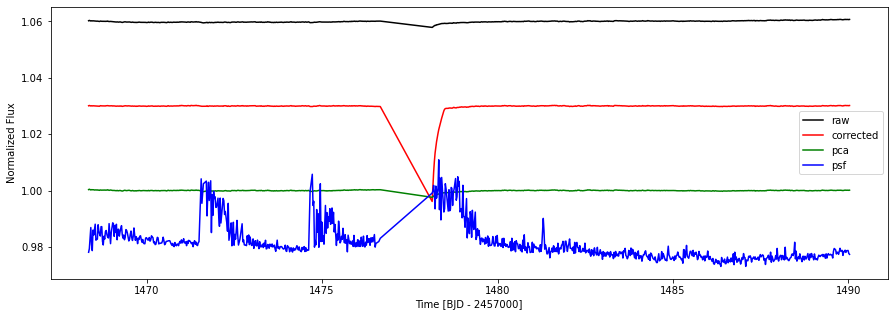

In [4]:
q = star_data.quality == 0
plt.figure(figsize=(15,5))


plt.plot(star_data.time[q], star_data.raw_flux[q]/np.nanmedian(star_data.raw_flux[q])+0.06, 'k',label='raw')
plt.plot(star_data.time[q], star_data.corr_flux[q]/np.nanmedian(star_data.corr_flux[q]) + 0.03, 'r',label='corrected')
plt.plot(star_data.time[q], star_data.pca_flux[q]/np.nanmedian(star_data.pca_flux[q]), 'g',label='pca')
plt.plot(star_data.time[q], star_data.psf_flux[q]/np.nanmedian(star_data.psf_flux[q]) - 0.02, 'b',label='psf')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.legend();

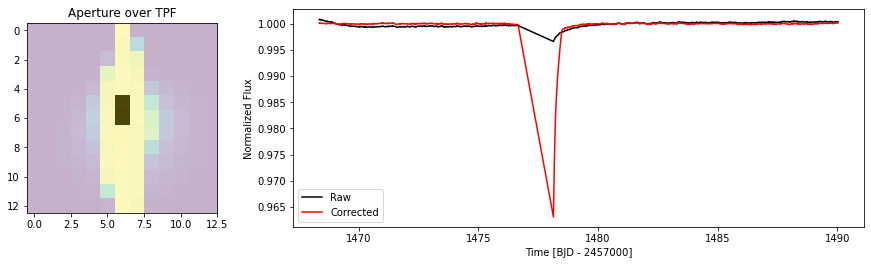

In [5]:
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax.imshow(star_data.tpf[0])
ax.imshow(star_data.all_apertures[0], cmap='Greys', alpha=0.7)
ax.set_title('Aperture over TPF')

ax1.plot(star_data.time[q], star_data.all_raw_flux[0][q]/np.nanmedian(star_data.all_raw_flux[0][q]), 'k', label='Raw')
ax1.plot(star_data.time[q], star_data.all_corr_flux[0][q]/np.nanmedian(star_data.all_corr_flux[0][q]), 'r', label='Corrected')
ax1.set_xlabel('Time [BJD - 2457000]')
ax1.set_ylabel('Normalized Flux')
ax1.legend();

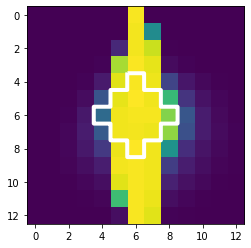

In [6]:
vis = eleanor.Visualize(star_data)
vis.aperture_contour()

## Custom Aperture

Text(0, 0.5, 'Normalized Flux')

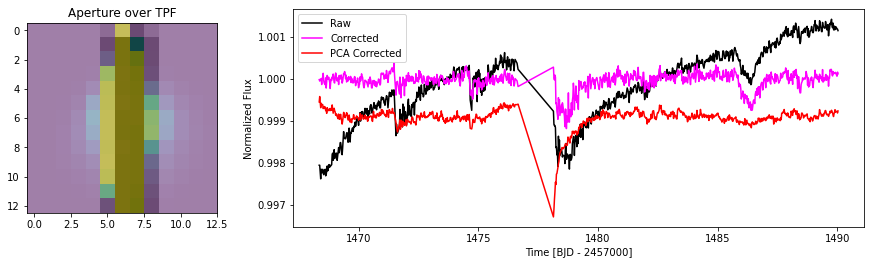

In [25]:
eleanor.TargetData.custom_aperture(star_data, shape='rectangle', h=13, w=3)
eleanor.TargetData.get_lightcurve(star_data)

fig, (ax2, ax3) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax2.imshow(star_data.tpf[0])
ax2.imshow(star_data.aperture, cmap='Greys', alpha=0.5)
ax2.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

ax3.plot(star_data.time[q], star_data.raw_flux[q]/np.nanmedian(star_data.raw_flux[q]), 'black', label='Raw')
ax3.plot(star_data.time[q], star_data.corr_flux[q]/np.nanmedian(star_data.corr_flux[q]), 'magenta', label='Corrected')
ax3.plot(star_data.time[q], star_data.pca_flux[q]/np.nanmedian(star_data.pca_flux[q]) - 0.0009, 'r', label='PCA Corrected')
ax3.legend(loc='upper left')         
#ax2.set_ylim([0.997,1.001])
#ax2.set_xlim([1485,1487])
ax3.set_xlabel('Time [BJD - 2457000]')
ax3.set_ylabel('Normalized Flux')


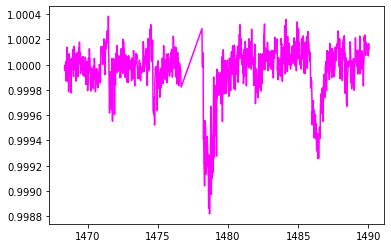

In [24]:
eleanor.TargetData.custom_aperture(star_data, shape='rectangle', h=14, w=4.5)
plt.plot(star_data.time[q], star_data.corr_flux[q]/np.nanmedian(star_data.corr_flux[q]), 'magenta', label='Corrected')

notes:

```star = eleanor.Source(tic=bucket.TIC_ID[i],sector=bucket.sector[i])
 data = eleanor.TargetData(star, height=13, width=13, bkg_size=31, do_psf=True, do_pca=True)```
 
 could be a possible idea of how to download raw `eleanor` files and operate saturated star analysis on that.

In [12]:
cd automated_exocomet_hunt/

/home/astro/phrdhx/automated_exocomet_hunt


In [15]:
from analysis_tools_cython import *
import data
import loaders
from astropy.stats import sigma_clip,sigma_clipped_stats
from astropy.table import Table
from astropy.time import Time

In [19]:
bad_times = data.load_bad_times()
bad_times = bad_times - 2457000
mad_df = data.load_mad()

In [22]:
sec = 6
cam = 1
mad_arr = mad_df.loc[:len(custom)-1, f"{sec}-{cam}"]

TypeError: object of type 'NoneType' has no len()

In [26]:
clip = 3
sig_test = sigma_clip(mad_arr,sigma=clip,masked=False)
med_sig_clip = np.nanmedian(sig_test)
rms_sig_clip = np.nanstd(sig_test)


NameError: name 'mad_arr' is not defined